#Case Study:Office Supplies Orders Analysis

#Business Obective :- An office-furniture-and-suppl ies company with a Global footprint wants to analyze its historicalorders' information to be able to better understand how its business has performed across the different markets,customer segments,and product categories.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import scipy
import matplotlib.pyplot as plt

In [49]:
df = pd.read_excel("C:/Users/Manikandan/Downloads/Office Supplies Orders Case Study Data.xlsx",sheet_name ='Data')
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium
51286,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High
51287,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,1.580,High
51288,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,São Paulo,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium


# Data Health Review

In [3]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Postal Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
df.info()
# All columns are proper format and 
#only postal code column contain null values so we can drop postal code column for further analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   Postal Code     9994 non-null   float64       
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [226]:
df["Total sales"] = df["Sales"]*df["Quantity"]
df
#After seeing sales column we analysed sales column is price of the product so we added new column total sales i.e price*qty

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,duration,Orderprior_Numeric,Total sales
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,221.980,2,0.0,62.1544,40.770,High,2014,2,3.0,443.960
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,3709.395,9,0.1,-288.7650,923.630,Critical,2014,2,4.0,33384.555
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,5175.171,9,0.1,919.9710,915.490,Medium,2014,1,NaN,46576.539
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,2892.510,5,0.1,-96.5400,910.160,Medium,2014,2,NaN,14462.550
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,2832.960,8,0.0,311.5200,903.040,Critical,2014,1,4.0,22663.680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,...,65.100,5,0.0,4.5000,1.010,Medium,2015,0,NaN,325.500
51286,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,...,16.720,5,0.2,3.3440,1.930,High,2014,4,3.0,83.600
51287,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,...,8.560,2,0.0,2.4824,1.580,High,2012,5,3.0,17.120
51288,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,São Paulo,...,13.440,2,0.0,2.4000,1.003,Medium,2013,4,NaN,26.880


In [227]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Year,duration,Orderprior_Numeric,Total sales
count,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,21857.000000,51290.000000
mean,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567,2013.777208,3.969370,2.958091,1205.327987
std,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373,1.098931,1.729437,0.788530,3452.079528
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000,2012.000000,0.000000,1.000000,0.444000
25%,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000,2013.000000,3.000000,3.000000,66.930000
50%,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000,2014.000000,4.000000,3.000000,245.772000
75%,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000,2015.000000,5.000000,3.000000,904.875000
max,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2015.000000,7.000000,4.000000,135830.880000


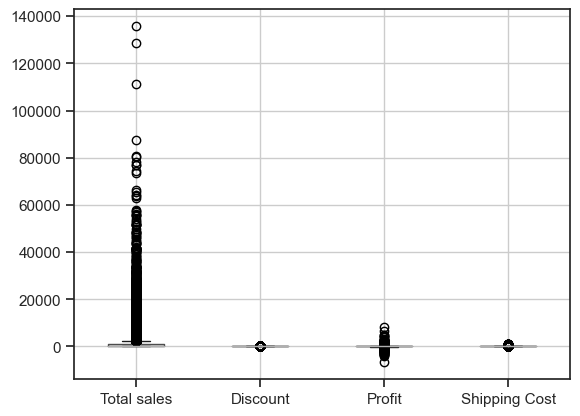

<Figure size 2000x10000 with 0 Axes>

In [228]:
selected_columns = df[['Total sales', 'Discount', 'Profit','Shipping Cost']]
selected_columns.boxplot(vert=True)
plt.figure(figsize=(20, 100))
plt.show()
# As we see few outliers present in sales and profit

In [229]:
df[df.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,duration,Orderprior_Numeric,Total sales


In [9]:
df.isna().sum()

Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [230]:
df.nunique()
# As we can see there are Market have 5 unique()

Order ID              25728
Order Date             1430
Ship Date              1464
Ship Mode                 4
Customer ID           17415
Customer Name           796
Segment                   3
Postal Code             631
City                   3650
State                  1102
Country                 165
Region                   23
Market                    5
Product ID             3788
Category                  3
Sub-Category             17
Product Name           3788
Sales                 27200
Quantity                 14
Discount                 29
Profit                28234
Shipping Cost         16753
Order Priority            4
Year                      4
duration                  8
Orderprior_Numeric        3
Total sales           30427
dtype: int64

In [231]:
df["Market"].unique()

array(['USCA', 'Asia Pacific', 'Europe', 'Africa', 'LATAM'], dtype=object)

In [14]:
df.describe(include="object")

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25728,4,17415,796,3,3650,1102,165,23,5,3788,3,17,3788,4
top,CA-2015-SV20365140-42268,Standard Class,SV-203651406,Muhammed Yedwab,Consumer,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Office Supplies,Binders,Staples,Medium
freq,14,30775,26,108,26518,915,2001,9994,5883,14302,227,31289,6146,227,29433


# Exploratory Data Analysis

# univariate Analysis

In [54]:
df['Order Date'] = pd.to_datetime(df["Order Date"])

In [55]:
df['Year'] = df['Order Date'].dt.year
#created one more column for year

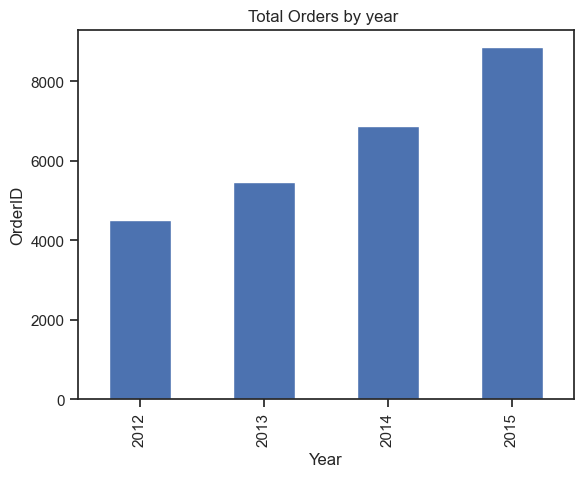

Year
2012    4515
2013    5473
2014    6883
2015    8857
Name: Order ID, dtype: int64

In [56]:
Orderid_year = df.groupby("Year")['Order ID'].nunique()
Orderid_year.plot.bar()
plt.xlabel('Year')
plt.ylabel('OrderID')
plt.title('Total Orders by year ')
plt.show()
df.groupby("Year")['Order ID'].nunique()
# every year the order is increasing

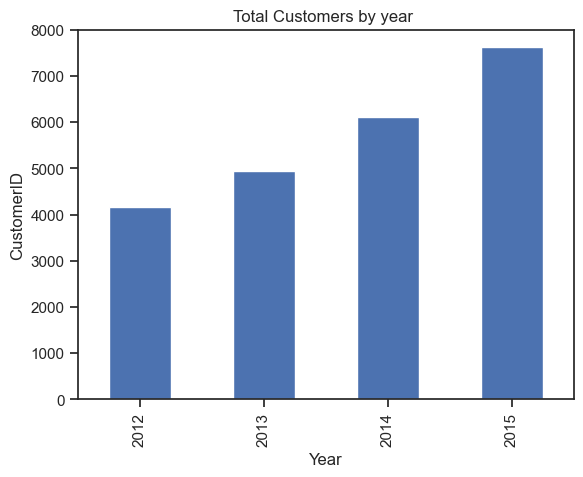

Year
2012    4164
2013    4949
2014    6113
2015    7624
Name: Customer ID, dtype: int64

In [232]:
Customerid_year = df.groupby("Year")['Customer ID'].nunique()
Customerid_year.plot.bar()
plt.xlabel('Year')
plt.ylabel('CustomerID')
plt.title('Total Customers by year ')
plt.show()
df.groupby("Year")['Customer ID'].nunique()
# every year Customer gaining is in uptrend

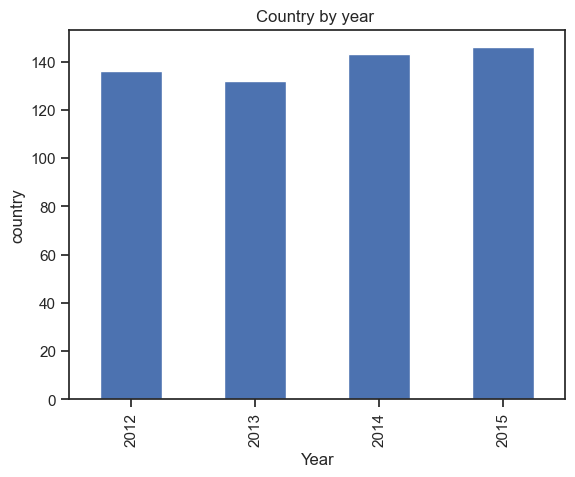

Year
2012    136
2013    132
2014    143
2015    146
Name: Country, dtype: int64

In [233]:
Market_year = df.groupby("Year")['Country'].nunique()
Market_year.plot.bar()
plt.xlabel('Year')
plt.ylabel('country')
plt.title('Country by year ')
plt.show()
df.groupby("Year")['Country'].nunique()

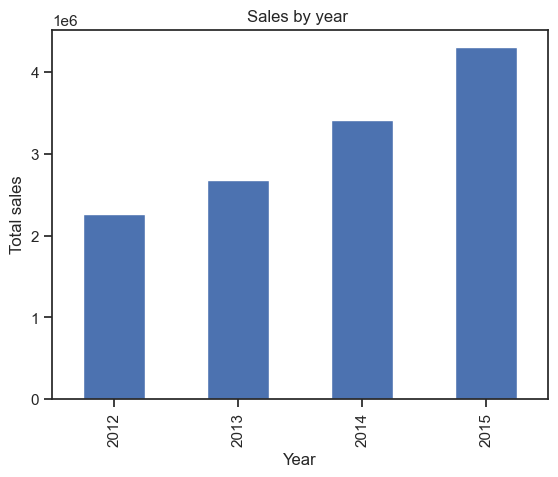

Year
2012    11129606.0
2013    12962195.0
2014    16743659.0
2015    20985812.0
Name: Total sales, dtype: float64

In [345]:
Sales_year = df.groupby("Year")['Total sales'].sum()
sales_year.plot.bar()
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.title('Sales by year ')
plt.show()
Sales_year.round()

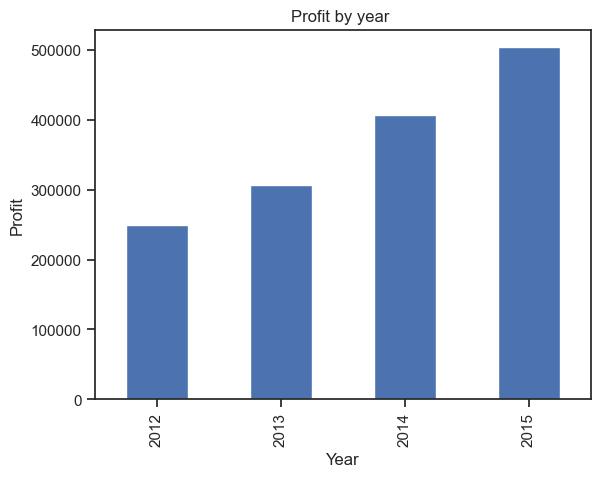

Year
2012    248940.81154
2013    307415.27910
2014    406935.23018
2015    504165.97046
Name: Profit, dtype: float64

In [60]:
Profit_year = df.groupby("Year")['Profit'].sum()
Profit_year.plot.bar()
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit by year ')
plt.show()
df.groupby("Year")['Profit'].sum()

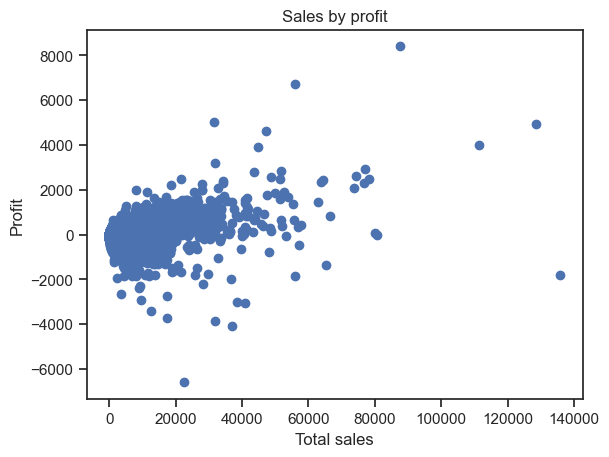

In [235]:
plt.scatter(df['Total sales'], df['Profit'])
plt.xlabel('Total sales')
plt.ylabel('Profit')
plt.title('Sales by profit')
plt.show()
#as sales is increasing profit is also increasing

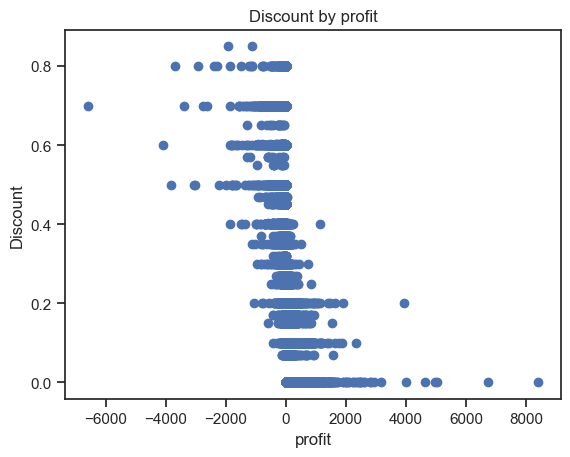

In [236]:
plt.scatter(df['Profit'], df['Discount'])
plt.xlabel('profit')
plt.ylabel('Discount')
plt.title('Discount by profit')
plt.show()

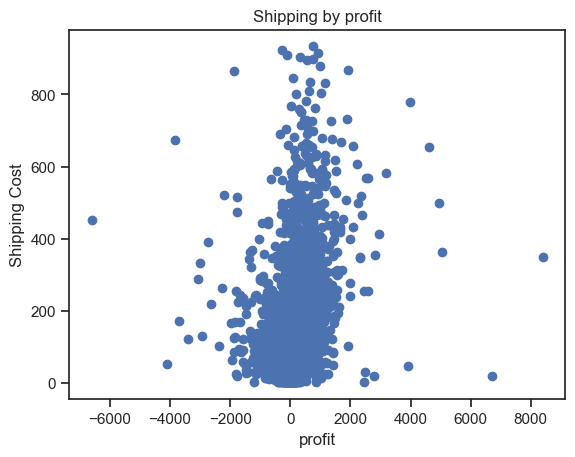

In [237]:
plt.scatter(df['Profit'], df['Shipping Cost'])
plt.xlabel('profit')
plt.ylabel('Shipping Cost')
plt.title('Shipping by profit')
plt.show()

In [238]:
Market_sales = df.groupby("Market").agg({"Total sales":"sum"})
Market_sales.round()

,Total sales
Market,
Africa,3130178.0
Asia Pacific,20084656.0
Europe,16284021.0
LATAM,10597086.0
USCA,11725332.0


In [79]:
Market_cust = df.groupby("Market").agg({"Customer ID":"nunique"})
Market_cust

,Customer ID
Market,
Africa,2055
Asia Pacific,4941
Europe,4035
LATAM,3702
USCA,2682


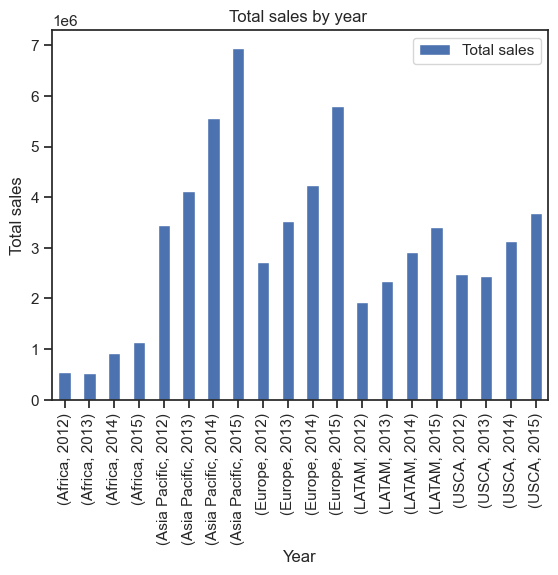

Total sales
Market       Year             
Africa       2012     544457.0
             2013     526410.0
             2014     918145.0
             2015    1141166.0
Asia Pacific 2012    3455118.0
             2013    4120717.0
             2014    5555023.0
             2015    6953799.0
Europe       2012    2723681.0
             2013    3532179.0
             2014    4234357.0
             2015    5793804.0
LATAM        2012    1919308.0
             2013    2348178.0
             2014    2911016.0
             2015    3418585.0
USCA         2012    2487044.0
             2013    2434711.0
             2014    3125118.0
             2015    3678459.0

In [239]:
Profit_year = df.groupby(["Market","Year"]).agg({"Total sales":"sum"})
Profit_year.sort_values(by="Year", ascending=False)
Profit_year.plot.bar()
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.title('Total sales by year ')
plt.show()
Profit_year.round()
# Asia pacific market have high sales every year

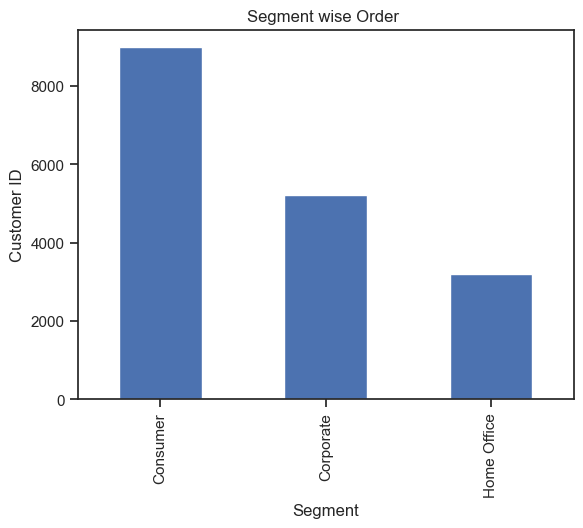

In [344]:
seg_order = df.groupby("Segment")['Customer ID'].nunique()
seg_order.plot.bar()
plt.xlabel('Segment')
plt.ylabel('Customer ID')
plt.title('Segment wise Order ')
plt.show()
# consumer Segment have large number of Customer

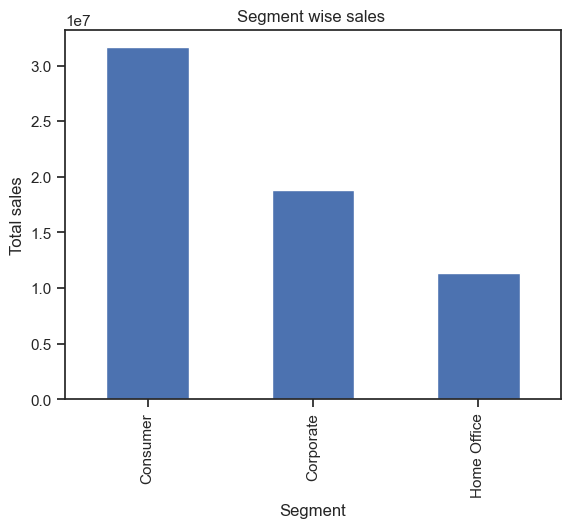

Segment
Consumer       3.165334e+07
Corporate      1.881082e+07
Home Office    1.135711e+07
Name: Total sales, dtype: float64

In [240]:
seg_Sales = df.groupby("Segment")['Total sales'].sum()
seg_Sales.plot.bar()
plt.xlabel('Segment')
plt.ylabel('Total sales')
plt.title('Segment wise sales ')
plt.show()
df.groupby("Segment")['Total sales'].sum()
# every year Customer gaining is in uptrend

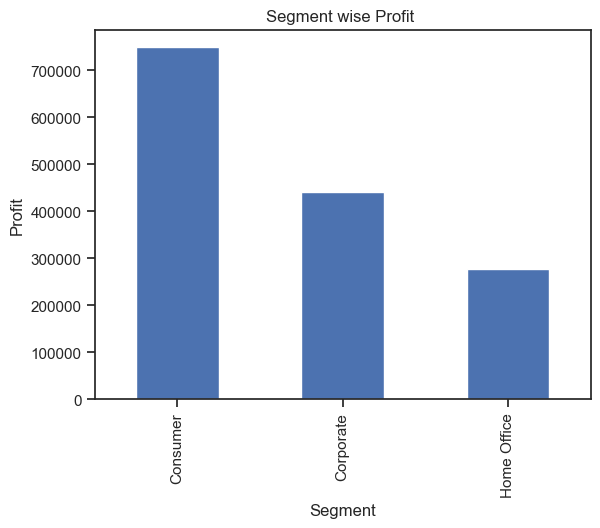

Segment
Consumer       749239.78206
Corporate      441208.32866
Home Office    277009.18056
Name: Profit, dtype: float64

In [74]:
seg_Profit = df.groupby("Segment")['Profit'].sum()
seg_Profit.plot.bar()
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Segment wise Profit ')
plt.show()
df.groupby("Segment")['Profit'].sum()
# Consumer Segment given more profit.

In [241]:
df_2012 = df[df["Year"]==2012]
df_2013 = df[df["Year"]==2013]
df_2014 = df[df["Year"]==2014]
df_2015 = df[df["Year"]==2015]

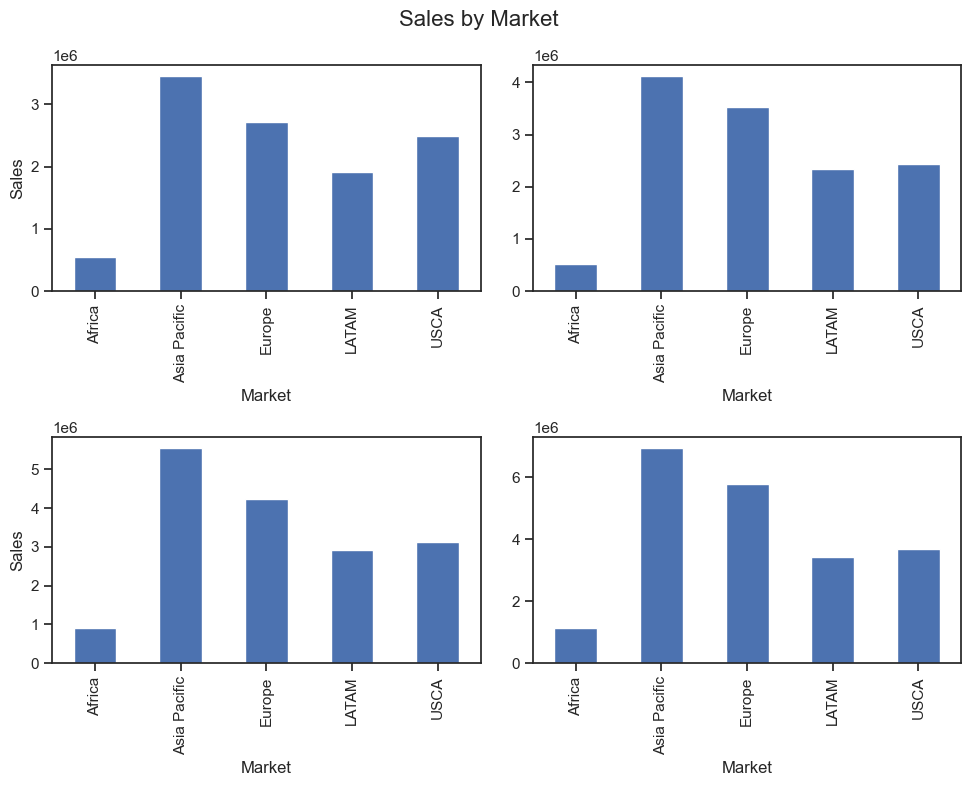

Total sales
Market       Year             
Africa       2012     544457.0
             2013     526410.0
             2014     918145.0
             2015    1141166.0
Asia Pacific 2012    3455118.0
             2013    4120717.0
             2014    5555023.0
             2015    6953799.0
Europe       2012    2723681.0
             2013    3532179.0
             2014    4234357.0
             2015    5793804.0
LATAM        2012    1919308.0
             2013    2348178.0
             2014    2911016.0
             2015    3418585.0
USCA         2012    2487044.0
             2013    2434711.0
             2014    3125118.0
             2015    3678459.0

In [336]:
sales_year2012 = df_2012.groupby("Market").agg({"Total sales": "sum"})
sales_year2013 = df_2013.groupby("Market").agg({"Total sales": "sum"})
sales_year2014 = df_2014.groupby("Market").agg({"Total sales": "sum"})
sales_year2015 = df_2015.groupby("Market").agg({"Total sales": "sum"})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sales_year2012.plot.bar(ax=axes[0, 0], legend=False)
sales_year2013.plot.bar(ax=axes[0, 1], legend=False)
sales_year2014.plot.bar(ax=axes[1, 0], legend=False)
sales_year2015.plot.bar(ax=axes[1, 1], legend=False)
fig.suptitle('Sales by Market', fontsize=16)
axes[1, 0].set_xlabel('Market')
axes[1, 1].set_xlabel('Market')
axes[0, 0].set_ylabel('Sales')
axes[1, 0].set_ylabel('Sales')
plt.tight_layout()
plt.show()
a = df.groupby(["Market","Year"]).agg({"Total sales":"sum"})
a.round()

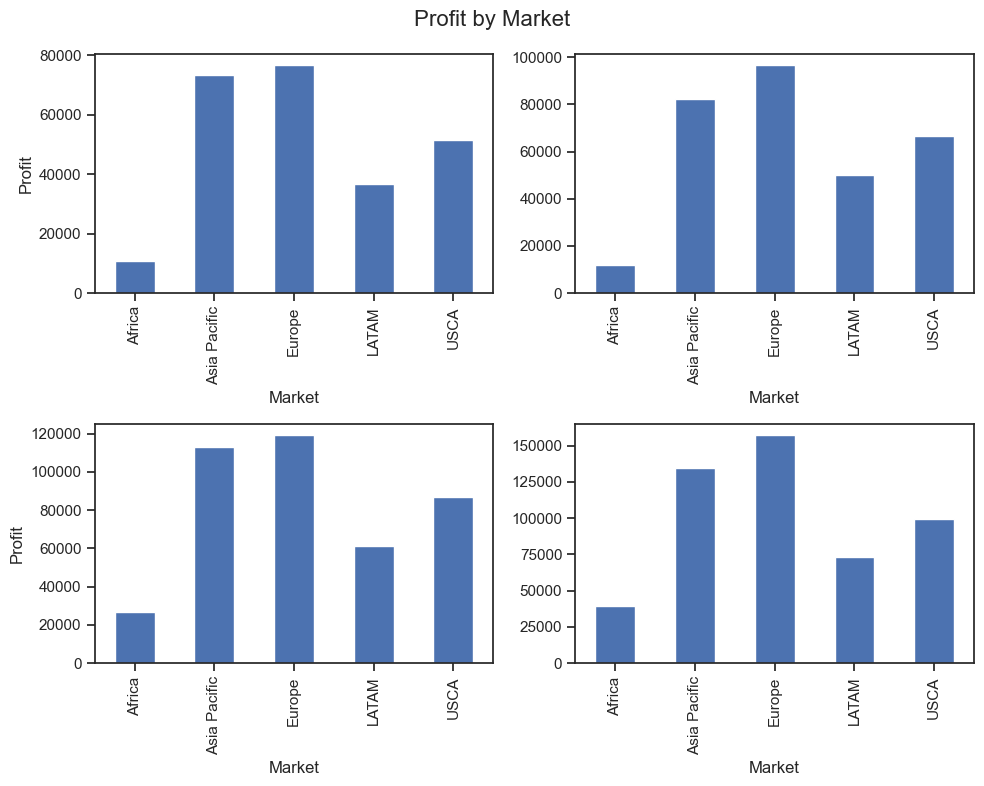

Profit
Market       Year          
Africa       2012   10944.0
             2013   11909.0
             2014   26687.0
             2015   39331.0
Asia Pacific 2012   73271.0
             2013   82253.0
             2014  112807.0
             2015  134845.0
Europe       2012   76666.0
             2013   96562.0
             2014  119169.0
             2015  157154.0
LATAM        2012   36708.0
             2013   50185.0
             2014   61415.0
             2015   73335.0
USCA         2012   51351.0
             2013   66506.0
             2014   86856.0
             2015   99501.0

In [337]:
Profit_year2012 = df_2012.groupby("Market").agg({"Profit": "sum"})
Profit_year2013 = df_2013.groupby("Market").agg({"Profit": "sum"})
Profit_year2014 = df_2014.groupby("Market").agg({"Profit": "sum"})
Profit_year2015 = df_2015.groupby("Market").agg({"Profit": "sum"})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
Profit_year2012.plot.bar(ax=axes[0, 0], legend=False)
Profit_year2013.plot.bar(ax=axes[0, 1], legend=False)
Profit_year2014.plot.bar(ax=axes[1, 0], legend=False)
Profit_year2015.plot.bar(ax=axes[1, 1], legend=False)
fig.suptitle('Profit by Market', fontsize=16)
axes[1, 0].set_xlabel('Market')
axes[1, 1].set_xlabel('Market')
axes[0, 0].set_ylabel('Profit')
axes[1, 0].set_ylabel('Profit')
plt.tight_layout()
plt.show()
a = df.groupby(["Market","Year"]).agg({"Profit":"sum"})
a.round()

In [104]:
abc = df.groupby(["Product Name","Category"]).agg({"Sales":"sum"})
abc = abc.reset_index()
ded = abc.sort_values(by="Sales", ascending=False)
efg = ded.groupby("Category").head(3)
efg
# top 3 product from different category having high sales

,Product Name,Category,Sales
310,"Apple Smart Phone, Full Size",Technology,86935.7786
970,"Cisco Smart Phone, Full Size",Technology,76441.5306
2415,"Motorola Smart Phone, Full Size",Technology,73156.3030
1837,"Hon Executive Leather Armchair, Adjustable",Furniture,58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",Furniture,50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",Furniture,50121.5160
1210,"Eldon File Cart, Single Width",Office Supplies,34387.7287
1928,"Hoover Stove, White",Office Supplies,32842.6043
1926,"Hoover Stove, Red",Office Supplies,31663.7790


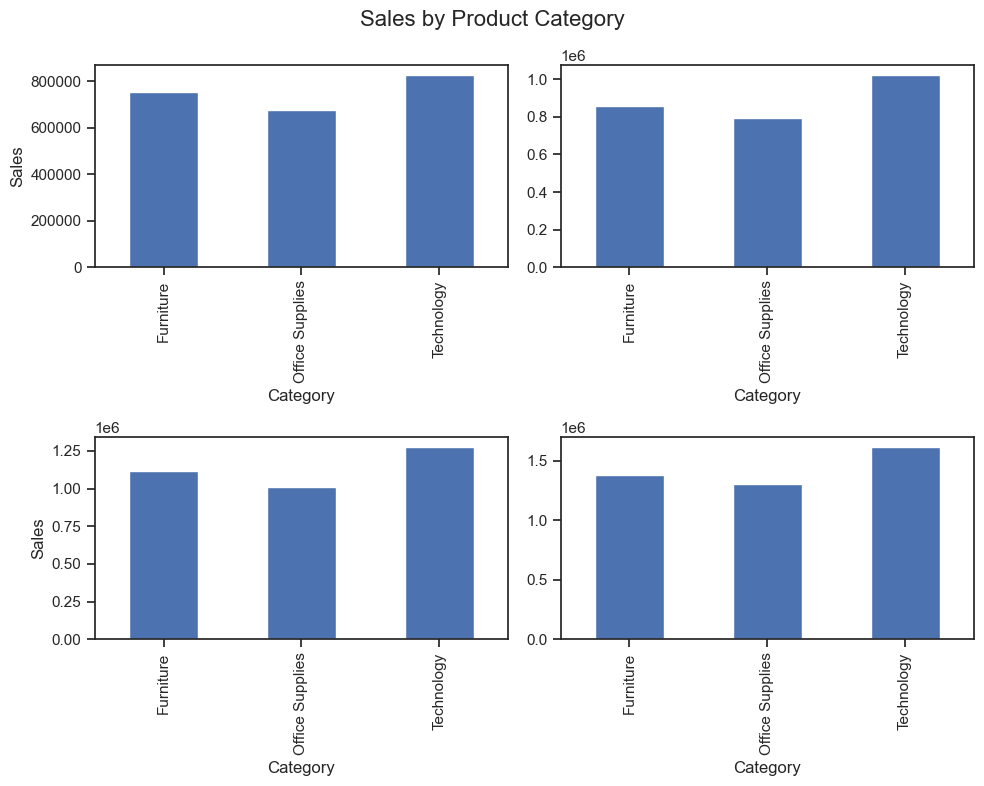

Sales
Category        Year           
Furniture       2012   756084.0
                2013   858822.0
                2014  1117629.0
                2015  1377917.0
Office Supplies 2012   675715.0
                2013   795175.0
                2014  1010812.0
                2015  1305790.0
Technology      2012   827652.0
                2013  1023442.0
                2014  1277305.0
                2015  1616159.0

In [105]:
ProductCategorysales_year2012 = df_2012.groupby("Category").agg({"Sales": "sum"})
ProductCategorysales_year2013 = df_2013.groupby("Category").agg({"Sales": "sum"})
ProductCategorysales_year2014 = df_2014.groupby("Category").agg({"Sales": "sum"})
ProductCategorysales_year2015 = df_2015.groupby("Category").agg({"Sales": "sum"})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ProductCategorysales_year2012.plot.bar(ax=axes[0, 0], legend=False)
ProductCategorysales_year2013.plot.bar(ax=axes[0, 1], legend=False)
ProductCategorysales_year2014.plot.bar(ax=axes[1, 0], legend=False)
ProductCategorysales_year2015.plot.bar(ax=axes[1, 1], legend=False)
fig.suptitle('Sales by Product Category', fontsize=16)
axes[1, 0].set_xlabel('Category')
axes[1, 1].set_xlabel('Category')
axes[0, 0].set_ylabel('Sales')
axes[1, 0].set_ylabel('Sales')
plt.tight_layout()
plt.show()
a = df.groupby(["Category","Year"]).agg({"Sales":"sum"})
a.round()
#Technology Category have the max Sales

In [111]:
Product_lessprofit = df.groupby(["Product Name","Category"]).agg({"Profit":"sum"})
Product_lessprofit= Product_lessprofit.reset_index()
prod_lprof= Product_lessprofit.sort_values(by="Profit", ascending=True)
prod_cat_lprofit = prod_lprof.groupby("Category").head(3)
prod_cat_lprofit
# Top 3 product from different category gives max loss

,Product Name,Category,Profit
1007,Cubify CubeX 3D Printer Double Head Print,Technology,-8879.9704
2233,Lexmark MX611dhe Monochrome Laser Printer,Technology,-4589.9730
2414,"Motorola Smart Phone, Cordless",Technology,-4447.0380
614,"Bevis Round Table, Adjustable Height",Furniture,-3649.8940
603,"Bevis Computer Table, Fully Assembled",Furniture,-3509.5638
2847,"Rogers Lockers, Blue",Office Supplies,-2893.4908
910,Chromcraft Bull-Nose Wood Oval Conference Tabl...,Furniture,-2876.1156
1231,"Eldon Lockers, Blue",Office Supplies,-2181.0964
1928,"Hoover Stove, White",Office Supplies,-2180.6257


# Loss making Product can be removed 

In [112]:
Product_profit = df.groupby(["Product Name","Category"]).agg({"Profit":"sum"})
Product_profit= Product_profit.reset_index()
prod_prof= Product_profit.sort_values(by="Profit", ascending=False)
prod_cat_profit = prod_prof.groupby("Category").head(3)
prod_cat_profit
# Top 3 product from different category gives max Profit

,Product Name,Category,Profit
866,Canon imageCLASS 2200 Advanced Copier,Technology,25199.9280
970,"Cisco Smart Phone, Full Size",Technology,17238.5206
2415,"Motorola Smart Phone, Full Size",Technology,17027.1130
1926,"Hoover Stove, Red",Office Supplies,11807.9690
3098,"Sauder Classic Bookcase, Traditional",Furniture,10672.0730
1714,"Harbour Creations Executive Leather Armchair, ...",Furniture,10427.3260
1429,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,7753.0390
2903,"SAFCO Executive Leather Armchair, Black",Furniture,7154.2800
2849,"Rogers Lockers, Single Width",Office Supplies,6755.1840


In [120]:
df.groupby("Year")['Order ID','Customer ID','Product ID'].nunique()
#count of Customer,Orders,Products by years

C:\Users\Manikandan\AppData\Local\Temp\ipykernel_37480\1078199571.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Year")['Order ID','Customer ID','Product ID'].nunique()


,Order ID,Customer ID,Product ID
Year,,,
2012,4515,4164,3022
2013,5473,4949,3087
2014,6883,6113,3242
2015,8857,7624,3418


In [246]:
df_catfurniture = df[df["Category"]=="Furniture"]
df_catfurniture

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,duration,Orderprior_Numeric,Total sales
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,3709.395,9,0.1,-288.7650,923.63,Critical,2014,2,4.0,33384.555
6,IN-2012-TS2134092-41219,2012-11-06,2012-11-08,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,Wellington,...,1822.080,4,0.0,564.8400,894.77,Critical,2012,2,4.0,7288.320
7,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,Waikato,...,5244.840,6,0.0,996.4800,878.38,High,2013,4,3.0,31469.040
8,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,341.960,2,0.0,54.7136,25.27,High,2014,2,3.0,683.920
9,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,...,48.712,1,0.2,5.4801,11.13,High,2012,1,3.0,48.712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51238,US-2014-GK1462036-41989,2014-12-16,2014-12-18,Second Class,GK-1462036,Grace Kelly,Corporate,NaN,La Vega,La Vega,...,48.930,3,0.5,-2.9700,1.05,Medium,2014,2,NaN,146.790
51241,CA-2015-ZC21910140-42315,2015-11-07,2015-11-12,Standard Class,ZC-219101404,Zuschuss Carroll,Consumer,90045.0,Los Angeles,California,...,8.730,1,0.0,2.9682,1.57,Medium,2015,5,NaN,8.730
51242,TU-2014-LW6990134-41804,2014-06-14,2014-06-18,Standard Class,LW-6990134,Lindsay Williams,Corporate,NaN,Kayseri,Kayseri,...,7.476,1,0.6,-9.5340,1.05,Medium,2014,4,NaN,7.476
51271,CA-2014-ZD21925140-41733,2014-04-04,2014-04-10,Standard Class,ZD-219251402,Zuschuss Donatelli,Consumer,47374.0,Richmond,Indiana,...,71.120,4,0.0,22.0472,7.30,Medium,2014,6,NaN,284.480


In [125]:
df.groupby("Category").agg({"Customer ID":"nunique"})
#from last four years furniture category have 7069 Unique customer

,Customer ID
Category,
Furniture,7069
Office Supplies,14266
Technology,7336


In [140]:
unique_customers = df_catfurniture['Customer ID'].nunique()
order_counts = df_catfurniture['Customer ID'].value_counts()
single_orders = order_counts[order_counts == 1].count()
repeat_orders = order_counts[order_counts > 1].count()
single_orders_percentage = (single_orders / unique_customers) * 100
repeat_orders_percentage = (repeat_orders / unique_customers) * 100
print(f"Number of unique customers in the last 4 years: {unique_customers}")
print(f"Percentage of customers with single orders: {single_orders_percentage:.2f}%")
print(f"Percentage of customers with repeat orders: {repeat_orders_percentage:.2f}%")


Number of unique customers in the last 4 years: 7069
Percentage of customers with single orders: 71.74%
Percentage of customers with repeat orders: 28.26%


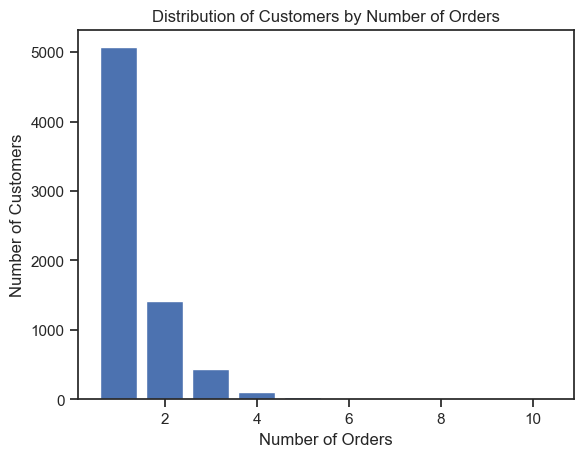

Distribution of Customers by Number of Orders:
1     5071
2     1418
3      431
4      106
5       31
6        8
7        1
8        2
10       1
Name: Customer ID, dtype: int64


In [338]:
order_counts = df_catfurniture['Customer ID'].value_counts()
order_counts_distribution = order_counts.value_counts().sort_index()
plt.bar(order_counts_distribution.index, order_counts_distribution.values)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Number of Orders')
plt.show()
print("Distribution of Customers by Number of Orders:")
print(order_counts_distribution)

# no of customer order once are greater than the customers who repeat the orders

In [340]:
summary = df.groupby('Sub-Category').agg({
    'Total sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Profit': 'sum',
    'Shipping Cost': 'sum'
})
summary = summary.rename(columns={
    'Sales': 'Total Sales',
    'Quantity': 'Total Quantity',
    'Discount': 'Average % Discount',
    'Profit': 'Total Profit',
    'Shipping Cost': 'Total Shipping Cost'
})
c = pd.DataFrame(summary)
c

,Total sales,Total Quantity,Average % Discount,Total Profit,Total Shipping Cost
Sub-Category,,,,,
Accessories,3.805275e+06,10946,0.120481,129626.30620,83592.3340
Appliances,5.026141e+06,6026,0.142078,141562.58770,108307.7460
Art,1.822214e+06,16215,0.117574,57829.85930,41889.0820
Binders,2.288963e+06,21403,0.179284,72433.15160,49773.1020
Bookcases,7.061789e+06,8310,0.153758,161924.41950,155487.9670
Chairs,7.446715e+06,12336,0.163110,140396.26750,164253.3520
Copiers,7.174849e+06,7454,0.117147,258567.54818,159501.2049
Envelopes,8.288482e+05,8210,0.132891,28849.48730,18582.9680
Fasteners,4.367733e+05,9051,0.137193,13844.28890,10300.0680


In [248]:
market_sales = df.groupby('Market')['Total sales'].sum()

biggest_market = market_sales.idxmax()

biggest_market_data = df[df['Market'] == biggest_market]

top_products = biggest_market_data.groupby('Product Name')['Total sales'].sum()

top_3_products = top_products.sort_values(ascending=False).head(3)
print("Biggest Market for the Firm:", biggest_market)
print("\nTop 3 Products in Terms of Sales for", biggest_market, ":")
print(top_3_products)


Biggest Market for the Firm: Asia Pacific

Top 3 Products in Terms of Sales for Asia Pacific :
Product Name
Motorola Smart Phone, Full Size      221327.4918
Nokia Smart Phone, with Caller ID    176466.9420
Cisco Smart Phone, Full Size         169119.6624
Name: Total sales, dtype: float64


In [319]:
Product_sales = df.groupby(["Product Name","Market","Year"]).agg({"Total sales":"sum"})
Product_sales = Product_sales.reset_index()
prod_sales= Product_sales.sort_values(by="Total sales",ascending=False)
prod_mar_sales = prod_sales.groupby(["Market","Year"]).head(1)
prod_mar_sales

,Product Name,Market,Year,Total sales
10438,GBC Ibimaster 500 Manual ProClick Binding System,USCA,2014,143444.7300
6842,Cisco TelePresence System EX90 Videoconferenci...,USCA,2012,135830.8800
6048,Canon imageCLASS 2200 Advanced Copier,USCA,2015,132299.6220
16422,"Motorola Smart Phone, Full Size",Asia Pacific,2014,119796.4272
13310,"Hoover Stove, Red",Europe,2015,114205.6230
21167,"Sauder Classic Bookcase, Traditional",Asia Pacific,2015,104724.7980
16846,"Nokia Smart Phone, Full Size",Europe,2013,97343.2980
12700,"Hon Executive Leather Armchair, Black",Asia Pacific,2013,91688.5698
20162,"Samsung Smart Phone, VoIP",Asia Pacific,2012,87164.8800
11615,"Hamilton Beach Stove, Silver",Europe,2012,78204.9600


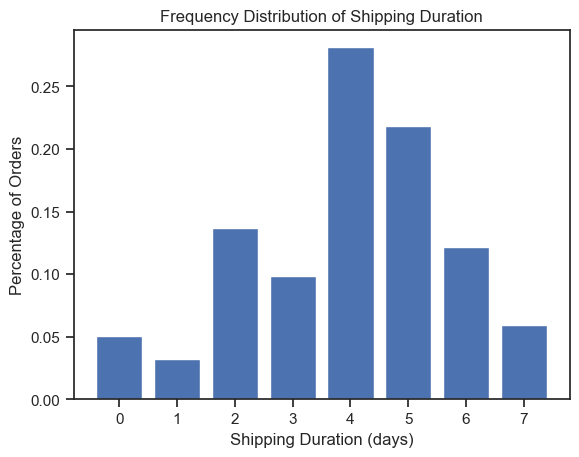

In [166]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['duration'] = (df['Ship Date'] - df['Order Date']).dt.days
frequency_distribution = df['duration'].value_counts(normalize=True).sort_index()
plt.bar(frequency_distribution.index, frequency_distribution.values)
plt.xlabel('Shipping Duration (days)')
plt.ylabel('Percentage of Orders')
plt.title('Frequency Distribution of Shipping Duration')
plt.show()
#Most of orders takes 4-5 days for delivery

In [320]:
# Create a mapping dictionary for the categories
Orderprior_mapping = {
    'Low': 1,
    'Medium ': 2,
    'High': 3,
    'Critical' :4}
df['Orderprior_Numeric'] = df['Order Priority'].map(Orderprior_mapping)

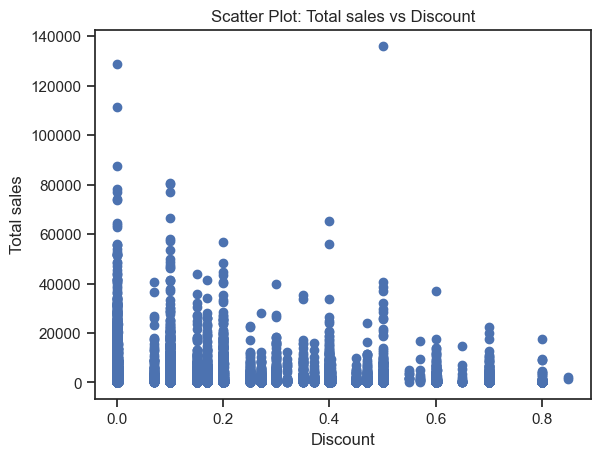

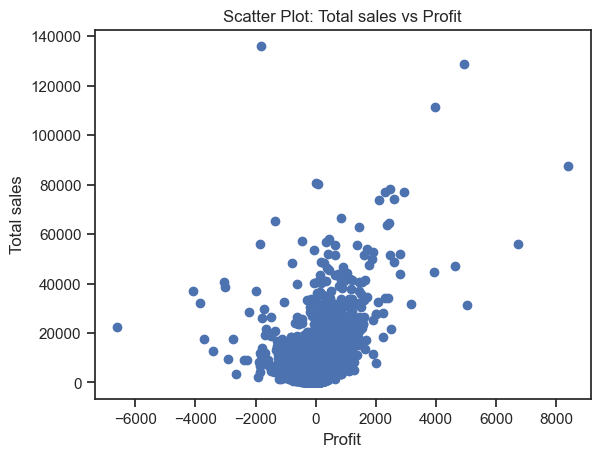

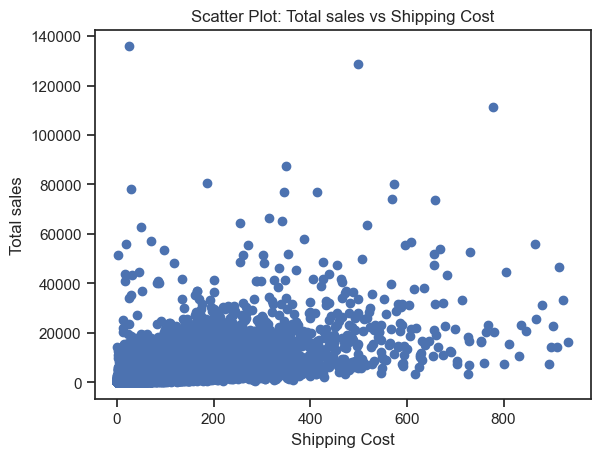

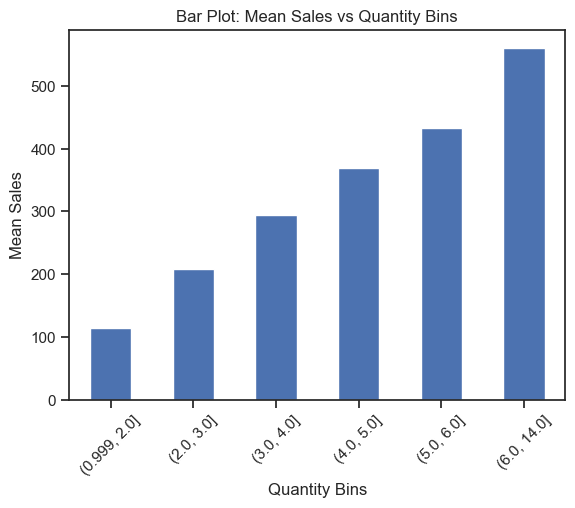

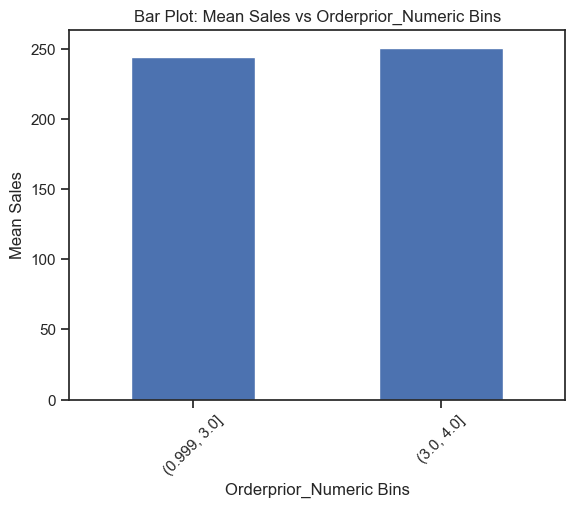

In [321]:
continuous_vars = ['Discount', 'Profit', 'Shipping Cost']
for var in continuous_vars:
    plt.scatter(df[var], df['Total sales'])
    plt.xlabel(var)
    plt.ylabel('Total sales')
    plt.title(f'Scatter Plot: Total sales vs {var}')
    plt.show()

# Bar plots for discrete variables after binning
discrete_vars = ['Quantity','Orderprior_Numeric']
num_bins = 8  # Number of bins for binning the data

for var in discrete_vars:
    # Apply binning to create equal-sized bins
    bins = pd.qcut(df[var], q=num_bins, duplicates='drop')

    # Calculate mean sales for each bin
    mean_sales = df.groupby(bins)['Sales'].mean()

    # Plot the bar plot
    mean_sales.plot(kind='bar')
    plt.xlabel(f'{var} Bins')
    plt.ylabel('Mean Sales')
    plt.title(f'Bar Plot: Mean Sales vs {var} Bins')
    plt.xticks(rotation=45)
    plt.show()


In [177]:
df["Order Priority"].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [326]:
df.groupby('Category')['Sales'].agg(['mean', 'median'])

,mean,median
Category,,
Furniture,416.881531,220.5903
Office Supplies,121.048692,46.3440
Technology,467.858939,260.3400


In [327]:
df.groupby('Market')['Sales'].agg(['mean', 'median'])

,mean,median
Market,,
Africa,170.868370,52.4400
Asia Pacific,282.663842,99.4977
Europe,280.274212,111.1200
LATAM,210.278334,80.3560
USCA,227.801988,54.9000


In [328]:
df.groupby('Segment')['Sales'].agg(['mean', 'median'])

,mean,median
Segment,,
Consumer,245.416299,85.005
Corporate,247.890176,85.440
Home Office,247.228403,84.600


In [331]:
s= df.groupby(['Customer Name','Year'])['Order ID'].nunique()
s= pd.DataFrame(s)
t = s.sort_values(by="Order ID", ascending=False)
t.head(3)
# this customer can be given a some type of coupons or rewards to retains them as we can see as most orderer customer

,,Order ID
Customer Name,Year,
Jane Waco,2015,24
Christine Sundaresam,2015,22
Bruce Degenhardt,2015,22


In [201]:
customer_order_counts = df.groupby(['Customer Name', 'Year'])['Order ID'].nunique()
customer_order_counts = pd.DataFrame(customer_order_counts)
customer_order_counts.sort_values(by='Year', ascending=False, inplace=True)
customer_order_counts.reset_index(inplace=True)
pivot_table = customer_order_counts.pivot(index='Customer Name', columns='Year', values='Order ID')
increased_customers = pivot_table[pivot_table.diff(axis=1).fillna(0).gt(0).all(axis=1)]
not_increased_customers = pivot_table[~pivot_table.index.isin(increased_customers.index)]
print("Customers who increased their order count every year:")
print(increased_customers)

print("\nCustomers who did not increase their order count:")
print(not_increased_customers)


Customers who increased their order count every year:
Empty DataFrame
Columns: [2012, 2013, 2014, 2015]
Index: []

Customers who did not increase their order count:
Year                2012  2013  2014  2015
Customer Name                             
Aaron Bergman        8.0   9.0  11.0   9.0
Aaron Hawkins       10.0   4.0  13.0   7.0
Aaron Smayling       7.0   8.0   4.0  12.0
Adam Bellavance      5.0   7.0  15.0  14.0
Adam Hart           10.0   7.0   9.0  16.0
...                  ...   ...   ...   ...
Xylona Preis         8.0   4.0  10.0   8.0
Yana Sorensen        5.0  11.0   7.0   9.0
Yoseph Carroll      11.0   7.0   6.0   7.0
Zuschuss Carroll     4.0   8.0   9.0  17.0
Zuschuss Donatelli   6.0   9.0   8.0   6.0

[796 rows x 4 columns]


In [216]:
product_profit_returns = df.groupby(['Year','Product Name'])['Profit'].sum()
product_profit_returns = product_profit_returns.reset_index()
product_profit_returns_sorted = product_profit_returns.sort_values(by="Profit",ascending=False)
product_profit_returns_sorted.head(10) 

,Year,Product Name,Profit
10143,2015,Canon imageCLASS 2200 Advanced Copier,15679.9552
6858,2014,Canon imageCLASS 2200 Advanced Copier,9519.9728
8196,2014,"Motorola Smart Phone, Full Size",7529.4882
4182,2013,Fellowes PB500 Electric Punch Plastic Comb Bin...,7498.8410
10228,2015,"Cisco Smart Phone, Full Size",7262.3480
7602,2014,"Harbour Creations Executive Leather Armchair, ...",6424.5296
11542,2015,"Motorola Smart Phone, Full Size",6307.5570
6947,2014,"Cisco Smart Phone, Full Size",6305.4030
11099,2015,"Hoover Stove, Red",5123.2340
12162,2015,"Sauder Classic Bookcase, Traditional",4937.9690


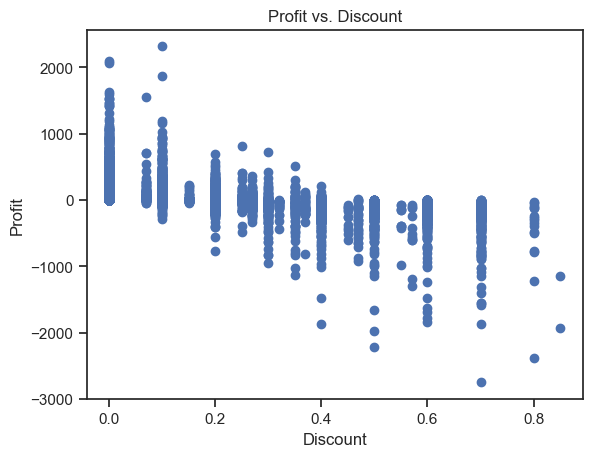

In [218]:
profit = df_catfurniture['Profit']
discount = df_catfurniture['Discount']
plt.scatter(discount, profit)
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()
# More discount leading to less profit or loss (Discount in range upto 18% is ok)

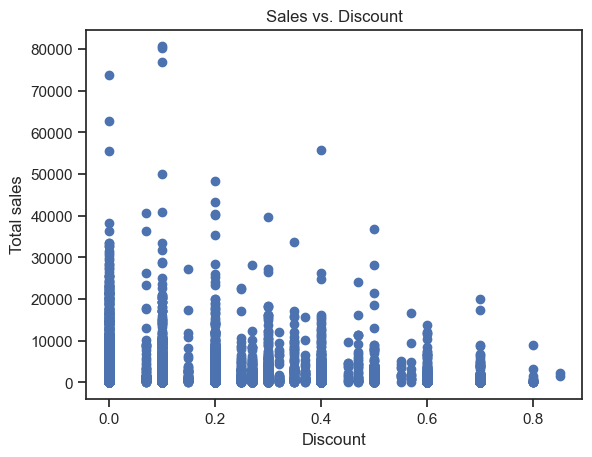

In [341]:
Sales = df_catfurniture['Total sales']
discount = df_catfurniture['Discount']
plt.scatter(discount,Sales)
plt.title('Sales vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Total sales')
plt.show()

In [300]:
profit_2012 = df_2012.groupby('Product Name')['Profit'].sum()
a1 = profit_2012.reset_index()
b1= a1.sort_values(by='Profit',ascending=False)
b= b1.head(3)
Totalsales_2012 = df_2012.groupby('Product Name')['Total sales'].sum()
c1 = Totalsales_2012.reset_index()
d1= c1.sort_values(by='Total sales',ascending=False)
d = d1.head(3)
print(b,"\n", d)

                              Product Name     Profit
1607  Ibico EPK-21 Electric Binding System  4630.4755
782      Cisco Smart Phone, with Caller ID  4066.8580
2007           Nokia Smart Phone, Cordless  3880.1850 
                                            Product Name  Total sales
787   Cisco TelePresence System EX90 Videoconferenci...    135830.88
2406                          Samsung Smart Phone, VoIP    121097.68
2007                        Nokia Smart Phone, Cordless     94786.35


In [350]:
profit_2013 = df_2013.groupby('Product Name')['Profit'].sum()
a = profit_2013.reset_index()
b = a.sort_values(by='Profit',ascending=False)
f=b.head(3)
Totalsales_2013 = df_2013.groupby('Product Name')['Total sales'].sum()
c = Totalsales_2013.reset_index()
d= c.sort_values(by='Total sales',ascending=False)
e = d.head(3)
print(f,"\n", e)

                                           Product Name    Profit
1160  Fellowes PB500 Electric Punch Plastic Comb Bin...  7498.841
3081                  Zebra ZM400 Thermal Label Printer  3343.536
2440                     Samsung Smart Phone, Full Size  2978.868 
                                Product Name  Total sales
257            Apple Smart Phone, Full Size  116871.5330
2033           Nokia Smart Phone, Full Size  109688.7675
1497  Hon Executive Leather Armchair, Black  104762.7738


In [302]:
profit_2014 = df_2014.groupby('Product Name')['Profit'].sum()
a2 = profit_2014.reset_index()
b2= a2.sort_values(by='Profit',ascending=False)
g = b2.head(3)
Totalsales_2014 = df_2014.groupby('Product Name')['Total sales'].sum()
c2 = Totalsales_2013.reset_index()
d2= c2.sort_values(by='Total sales',ascending=False)
e2 = d2.head(3)
print(g,"\n", e2)

                                           Product Name     Profit
749               Canon imageCLASS 2200 Advanced Copier  9519.9728
2087                    Motorola Smart Phone, Full Size  7529.4882
1493  Harbour Creations Executive Leather Armchair, ...  6424.5296 
                                            Product Name  Total sales
787   Cisco TelePresence System EX90 Videoconferenci...    135830.88
2406                          Samsung Smart Phone, VoIP    121097.68
2007                        Nokia Smart Phone, Cordless     94786.35


In [348]:
profit_2015 = df_2015.groupby('Product Name')['Profit'].sum()
b3= profit_2015.reset_index()
c3= b3.sort_values(by='Profit',ascending=False)
h = c3.head(3)
Totalsales_2015 = df_2015.groupby('Product Name')['Total sales'].sum()
c4 = Totalsales_2015.reset_index()
d4= c4.sort_values(by='Total sales',ascending=False)
e4 = d4.head(3)
print(h,"\n", e4)

                               Product Name      Profit
792   Canon imageCLASS 2200 Advanced Copier  15679.9552
877            Cisco Smart Phone, Full Size   7262.3480
2191        Motorola Smart Phone, Full Size   6307.5570 
                                     Product Name  Total sales
1666  Hon Executive Leather Armchair, Adjustable  164778.1667
877                 Cisco Smart Phone, Full Size  149147.8540
2808              Sauder Classic Bookcase, Metal  144380.7050


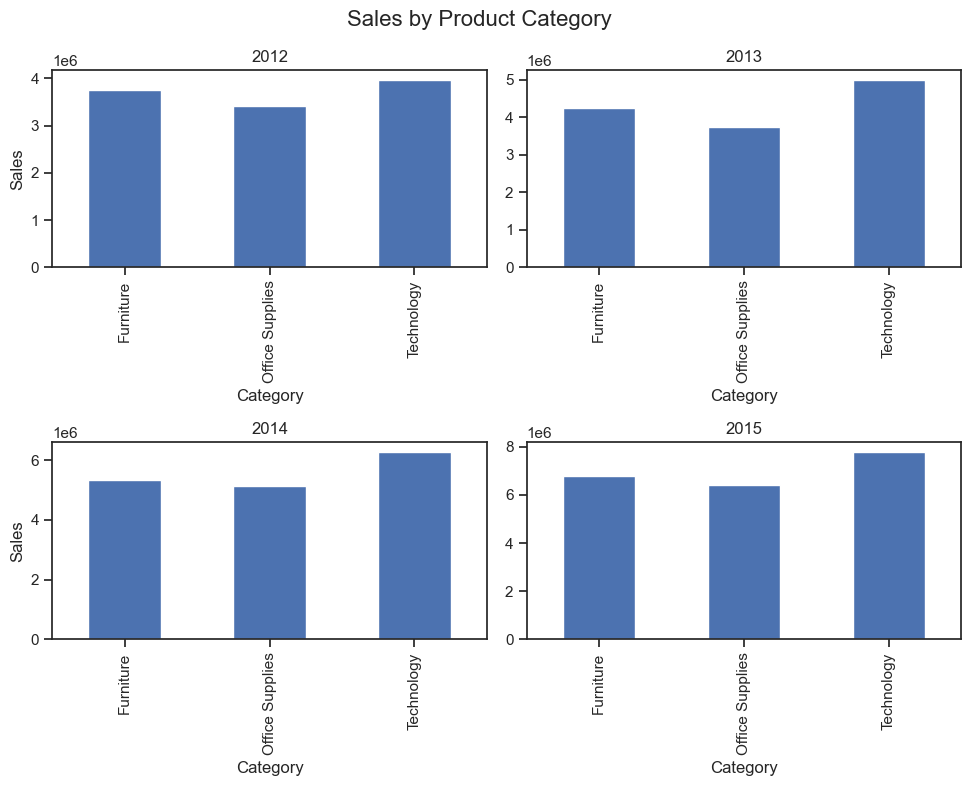

In [284]:
ProductCatsales_year2012 = df_2012.groupby("Category").agg({"Total sales": "sum"})
ProductCatsales_year2013 = df_2013.groupby("Category").agg({"Total sales": "sum"})
ProductCatsales_year2014 = df_2014.groupby("Category").agg({"Total sales": "sum"})
ProductCatsales_year2015 = df_2015.groupby("Category").agg({"Total sales": "sum"})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ProductCatsales_year2012.plot.bar(ax=axes[0, 0], legend=False)
axes[0, 0].set_title('2012')
ProductCatsales_year2013.plot.bar(ax=axes[0, 1], legend=False)
axes[0, 1].set_title('2013')
ProductCatsales_year2014.plot.bar(ax=axes[1, 0], legend=False)
axes[1, 0].set_title('2014')
ProductCatsales_year2015.plot.bar(ax=axes[1, 1], legend=False)
axes[1, 1].set_title('2015')
fig.suptitle('Sales by Product Category', fontsize=16)
axes[1, 0].set_xlabel('Category')
axes[1, 1].set_xlabel('Category')
axes[0, 0].set_ylabel('Sales')
axes[1, 0].set_ylabel('Sales')
plt.tight_layout()
plt.show()

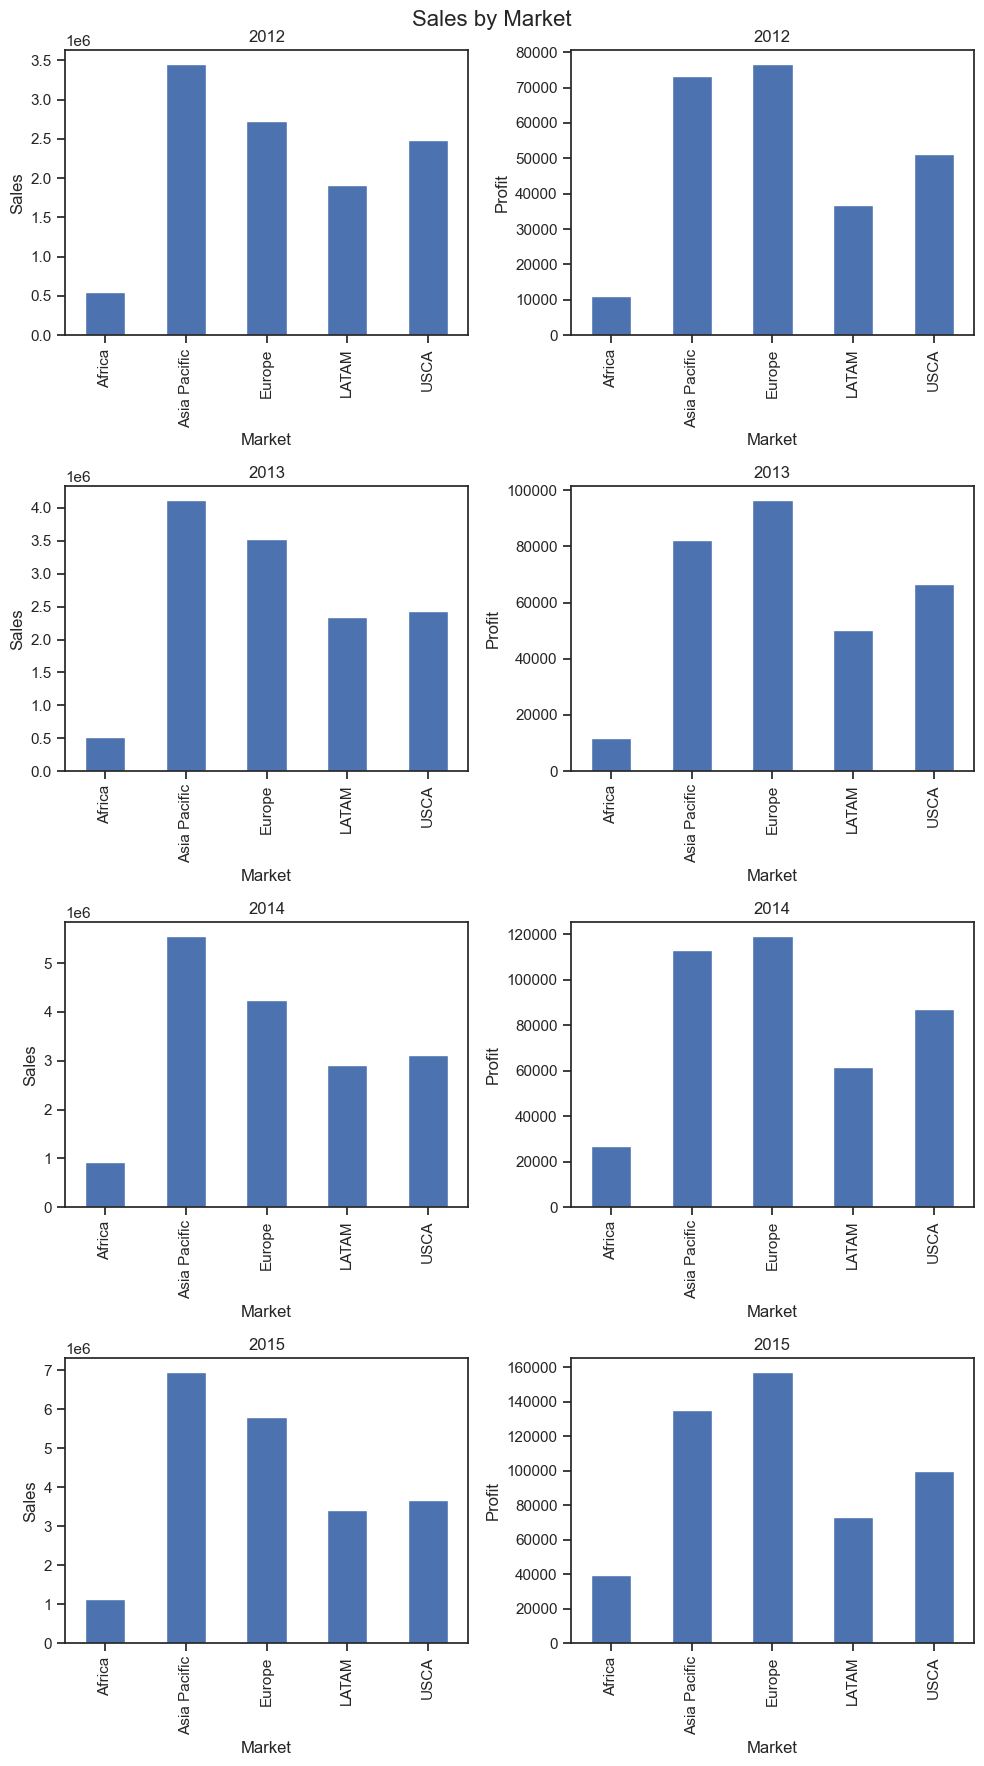

In [292]:
Productmarsales_year2012 = df_2012.groupby("Market").agg({"Total sales": "sum"})
ProductmarProfit_year2012 = df_2012.groupby("Market").agg({"Profit": "sum"})
Productmarsales_year2013 = df_2013.groupby("Market").agg({"Total sales": "sum"})
ProductmarProfit_year2013 = df_2013.groupby("Market").agg({"Profit": "sum"})
Productmarsales_year2014 = df_2014.groupby("Market").agg({"Total sales": "sum"})
ProductmarProfit_year2014 = df_2014.groupby("Market").agg({"Profit": "sum"})
Productmarsales_year2015 = df_2015.groupby("Market").agg({"Total sales": "sum"})
ProductmarProfit_year2015 = df_2015.groupby("Market").agg({"Profit": "sum"})
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 18))
Productmarsales_year2012.plot.bar(ax=axes[0, 0], legend=False)
axes[0, 0].set_title('2012')
ProductmarProfit_year2012.plot.bar(ax=axes[0, 1], legend=False)
axes[0, 1].set_title('2012')
Productmarsales_year2013.plot.bar(ax=axes[1, 0], legend=False)
axes[1, 0].set_title('2013')
ProductmarProfit_year2013.plot.bar(ax=axes[1, 1], legend=False)
axes[1,1].set_title('2013')
Productmarsales_year2014.plot.bar(ax=axes[2,0], legend=False)
axes[2, 0].set_title('2014')
ProductmarProfit_year2014.plot.bar(ax=axes[2, 1], legend=False)
axes[2, 1].set_title('2014')
Productmarsales_year2015.plot.bar(ax=axes[3, 0], legend=False)
axes[3, 0].set_title('2015')
ProductmarProfit_year2015.plot.bar(ax=axes[3, 1], legend=False)
axes[3,1].set_title('2015')
fig.suptitle('Sales and Profit by Market', fontsize=16)
axes[1, 0].set_xlabel('Market')
axes[1, 1].set_xlabel('Market')
axes[0, 0].set_ylabel('Sales')
axes[1, 0].set_ylabel('Sales')
axes[0, 1].set_ylabel('Profit')
axes[1, 1].set_ylabel('Profit')
axes[2, 0].set_ylabel('Sales')
axes[3, 0].set_ylabel('Sales')
axes[2, 1].set_ylabel('Profit')
axes[3, 1].set_ylabel('Profit')
plt.tight_layout()
plt.show()

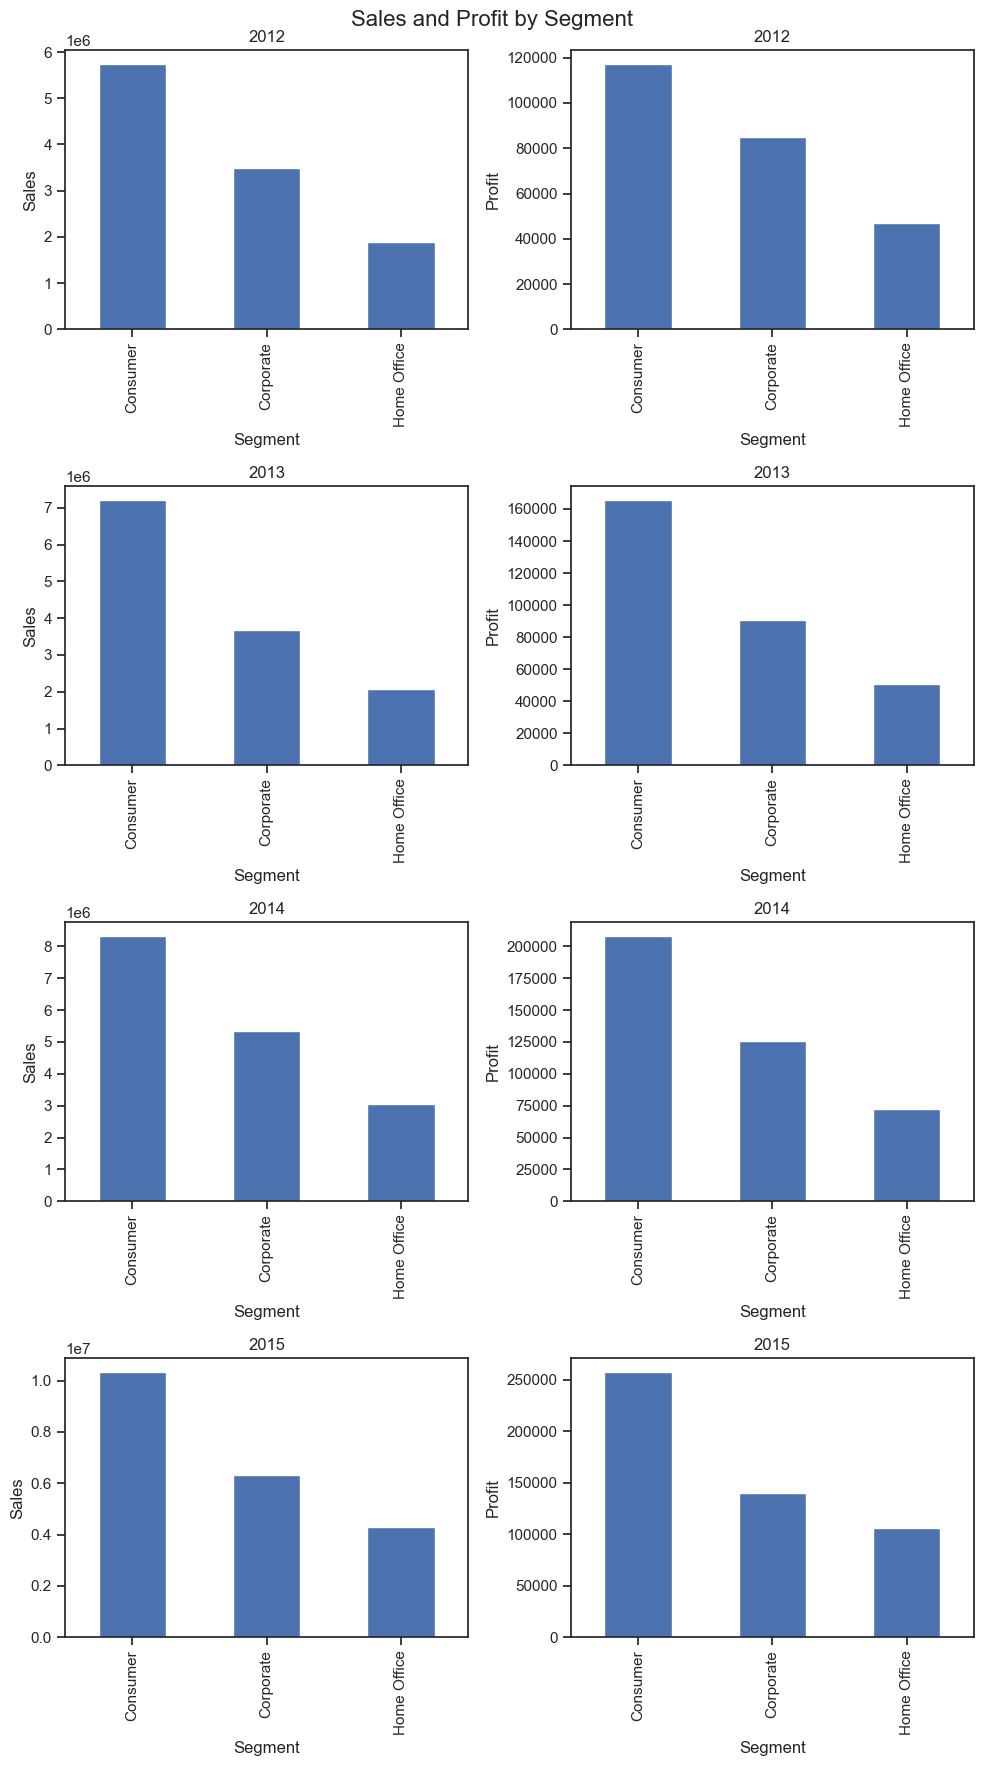

In [334]:
Custsegsales_year2012 = df_2012.groupby("Segment").agg({"Total sales": "sum"})
CustsegProfit_year2012 = df_2012.groupby("Segment").agg({"Profit": "sum"})
Custsegsales_year2013 = df_2013.groupby("Segment").agg({"Total sales": "sum"})
CustsegProfit_year2013 = df_2013.groupby("Segment").agg({"Profit": "sum"})
Custsegsales_year2014 = df_2014.groupby("Segment").agg({"Total sales": "sum"})
CustsegProfit_year2014 = df_2014.groupby("Segment").agg({"Profit": "sum"})
Custsegsales_year2015 = df_2015.groupby("Segment").agg({"Total sales": "sum"})
CustsegProfit_year2015 = df_2015.groupby("Segment").agg({"Profit": "sum"})
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 18))
Custsegsales_year2012.plot.bar(ax=axes[0, 0], legend=False)
axes[0, 0].set_title('2012')
CustsegProfit_year2012.plot.bar(ax=axes[0, 1], legend=False)
axes[0, 1].set_title('2012')
Custsegsales_year2013.plot.bar(ax=axes[1, 0], legend=False)
axes[1, 0].set_title('2013')
CustsegProfit_year2013.plot.bar(ax=axes[1, 1], legend=False)
axes[1,1].set_title('2013')
Custsegsales_year2014.plot.bar(ax=axes[2,0], legend=False)
axes[2, 0].set_title('2014')
CustsegProfit_year2014.plot.bar(ax=axes[2, 1], legend=False)
axes[2, 1].set_title('2014')
Custsegsales_year2015.plot.bar(ax=axes[3, 0], legend=False)
axes[3, 0].set_title('2015')
CustsegProfit_year2015.plot.bar(ax=axes[3, 1], legend=False)
axes[3,1].set_title('2015')
fig.suptitle('Sales and Profit by Segment', fontsize=16)
axes[1, 0].set_xlabel('Segment')
axes[1, 1].set_xlabel('Segment')
axes[0, 0].set_ylabel('Sales')
axes[1, 0].set_ylabel('Sales')
axes[0, 1].set_ylabel('Profit')
axes[1, 1].set_ylabel('Profit')
axes[2, 0].set_ylabel('Sales')
axes[3, 0].set_ylabel('Sales')
axes[2, 1].set_ylabel('Profit')
axes[3, 1].set_ylabel('Profit')
plt.tight_layout()
plt.show()

In [ ]:
Important Insights :-
# most of the customer opted Standard class shipping mode,
#Top Customer is Muhammed Yedwab from california who ordered max times 108
# Asia pacific market have High sales
# Office supply category product have ordered many times
# every year the order,Customer,profit and sales is increasing - UPtrend
# Consumer Segment have max customer,max sales
# Discount is inversly propartional to Profit
#Customers who increased their order count every year are null customer 
#top 3 product from asia pacific i.e largest market w.r.t sales
1)Motorola Smart Phone, Full Size      221327.4918
2)Nokia Smart Phone, with Caller ID    176466.9420
3)Cisco Smart Phone, Full Size         169119.662
# Discount is inversly propartinal to sales as company had given more discount to product which have low sales
# top 3 customer in last year 2015 who ordered many times( give some offers to retain this customer)
Jane Waco 	2015 	24
Christine Sundaresam 	2015 	22
Bruce Degenhardt 	2015 	22
#Number of unique customers in the last 4 years: 7069
#Percentage of customers with single orders: 71.74%
#Percentage of customers with repeat orders: 28.26%
# Even though Asia pacific market have high sales but Europe had given the higher profit
# More discount leading to less profit or loss (Discount in range upto 18% is ok)
#Most of orders takes 4-5 days for delivery (i.e 20%-25%)